<a href="https://colab.research.google.com/github/kalinakalina/DEDA_Cryptopunks/blob/main/EDA_accessoires.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# imports
import pandas as pd 
import requests
from requests import get
from bs4 import BeautifulSoup
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# helper functions
def fix_eth(x):
  x=str(x)
  x=x.replace('Ξ', '')
  x=x.replace('<', '')
  x=x.replace(',', '')
  if 'K' in x:
    x=float(x.replace('K', ''))
    x=x*1000
    return x
  return x

In [ ]:
# import transaction 
file = 'https://raw.githubusercontent.com/kalinakalina/DEDA_Cryptopunks/main/data/transaction.csv'
dft = pd.read_csv(file, header = None, index_col = 0)
dft.columns = ['type', 'from', 'to', 'date', 'punk_id', 'amount_in_eth', 'amount_in_dol']
dft = dft[ ['punk_id'] + [ col for col in dft.columns if col != 'punk_id' ] ]
dft.head()


,punk_id,type,from,to,date,amount_in_eth,amount_in_dol
0,,,,,,,
0,0,Bid Withdrawn,0x983ace,NaN,2021-05-10,250.0,1030000.0
1,0,Bid,0x983ace,NaN,2021-04-11,250.0,"537,615"
2,0,Bid Withdrawn,0xd7510a,NaN,2021-03-03,100.0,"160,973"
3,0,Bid,0xd7510a,NaN,2021-02-20,100.0,"188,897"
4,0,Bid Withdrawn,natealex,NaN,2020-09-16,69.0,"25,532"


In [ ]:
# import accessoires 
names=['gender', 'acc_1', 'acc_2', 'acc_3', 'acc_4', 'acc_5', 'acc_6', 'acc_7']
file = 'https://raw.githubusercontent.com/kalinakalina/DEDA_Cryptopunks/main/data/accessories.csv'
df = pd.read_csv(file, header=None, sep='\n')
df = df[0].str.split(',', expand=True)
df.drop(0, axis=1, inplace=True)
df.head()


,1,2,3,4,5,6,7,8
0,Female,Green Eye Shadow,Earring,Blonde Bob,None,None,None,None
1,Male,Smile,Mohawk,None,None,None,None,None
2,Female,Wild Hair,None,None,None,None,None,None
3,Male,Wild Hair,Nerd Glasses,Pipe,None,None,None,None
4,Male,Big Shades,Wild Hair,Earring,Goat,None,None,None


In [ ]:
dict={1:'gender', 
      2:  'acc_1',
      3:'acc_2', 
      4: 'acc_3',
      5:'acc_4',
      6: 'acc_5',
      7:'acc_6',
      8:'acc_7'}
df.rename(columns=dict,
          inplace=True)
  
df.head()

,gender,acc_1,acc_2,acc_3,acc_4,acc_5,acc_6,acc_7
0,Female,Green Eye Shadow,Earring,Blonde Bob,None,None,None,None
1,Male,Smile,Mohawk,None,None,None,None,None
2,Female,Wild Hair,None,None,None,None,None,None
3,Male,Wild Hair,Nerd Glasses,Pipe,None,None,None,None
4,Male,Big Shades,Wild Hair,Earring,Goat,None,None,None


In [ ]:
columns = df.select_dtypes(include=[object]).columns
df[columns] = df[columns].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   gender  10000 non-null  category
 1   acc_1   9992 non-null   category
 2   acc_2   9659 non-null   category
 3   acc_3   6099 non-null   category
 4   acc_4   1598 non-null   category
 5   acc_5   178 non-null    category
 6   acc_6   12 non-null     category
 7   acc_7   1 non-null      category
dtypes: category(8)
memory usage: 90.9 KB


# Types & Attributes

In [ ]:
page = requests.get("https://www.larvalabs.com/cryptopunks/attributes")
soup = BeautifulSoup(page.text, "html.parser")

tr_hist = soup.find_all('table')
df_acc_types = pd.read_html(str(tr_hist))[0]
df_acc_types = pd.DataFrame(df_acc_types.to_records())

dict={'index':'index',
      "('Punk Types', 'Attribute')":'types',
      "('Unnamed: 1_level_0', '#')":'number',
      "('Unnamed: 2_level_0', 'Avail')":'avail',
      "('Unnamed: 3_level_0', 'Avg Sale')":"avg_sale",
      "('Unnamed: 4_level_0', 'Cheapest')":'cheapest',
      "('Unnamed: 5_level_0', 'More Examples')":'more_examples'}
df_acc_types.rename(columns=dict,
          inplace=True)
df_acc_types.columns
df.head()
df_acc_types.avg_sale=df_acc_types.avg_sale.apply(fix_eth)
df_acc_types.cheapest=df_acc_types.cheapest.apply(fix_eth)

df_acc_types.avg_sale = df_acc_types.avg_sale.astype(np.float32)
df_acc_types.cheapest = df_acc_types.cheapest.astype(np.float32)
df_acc_types.types = df_acc_types.types.astype('category')
df_acc_types.drop('more_examples', axis=1, inplace=True)
df_acc_types.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   index     5 non-null      int64   
 1   types     5 non-null      category
 2   number    5 non-null      int64   
 3   avail     5 non-null      int64   
 4   avg_sale  5 non-null      float32 
 5   cheapest  4 non-null      float32 
dtypes: category(1), float32(2), int64(3)
memory usage: 505.0 bytes


# Feature explanation
* number: the amount of crpytopunk that have this feature
* avail: amount of crpytopunks currently available for sale
* avg_sale: avg sale over the last 90 days
* cheapest: cheapest punktwith this attribute that is currently for sale
* more example: dropped as it is not readable like this

In [ ]:
# scraping attributes data and transforming it
tr_hist = soup.find_all('table')
df_acc_att = pd.read_html(str(tr_hist))[1]

df_acc_att = pd.DataFrame(df_acc_att.to_records())
df_acc_att.columns
dict={'index':'index',
      "('Attributes', 'Attribute')":'attributes',
      "('Unnamed: 1_level_0', '#')":'number',
      "('Unnamed: 2_level_0', 'Avail')":'avail',
      "('Unnamed: 3_level_0', 'Avg Sale')":"avg_sale",
      "('Unnamed: 4_level_0', 'Cheapest')":'cheapest',
      "('Unnamed: 5_level_0', 'More Examples')":'more_examples'}
df_acc_att.rename(columns=dict,
          inplace=True)
df_acc_att.columns

df_acc_att.avg_sale=df_acc_att.avg_sale.apply(fix_eth)
df_acc_att.cheapest=df_acc_att.cheapest.apply(fix_eth)

df_acc_att.avg_sale = df_acc_att.avg_sale.astype(np.float32)
df_acc_att.cheapest = df_acc_att.cheapest.astype(np.float32)
df_acc_att.attributes = df_acc_att.attributes.astype('category')
df_acc_att.drop('more_examples', axis=1, inplace=True)
df_acc_att.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87 entries, 0 to 86
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   index       87 non-null     int64   
 1   attributes  87 non-null     category
 2   number      87 non-null     int64   
 3   avail       87 non-null     int64   
 4   avg_sale    87 non-null     float32 
 5   cheapest    87 non-null     float32 
dtypes: category(1), float32(2), int64(3)
memory usage: 5.7 KB


# Graphical discovery for attributes

In [ ]:
df_acc_att.sort_values(by=['avg_sale'], ascending=False)

,index,attributes,number,avail,avg_sale,cheapest
0,0,Beanie,44,11,156.000000,220.000000
2,2,Pilot Helmet,54,12,121.199997,130.000000
4,4,Orange Side,68,15,96.029999,65.559998
36,36,Hoodie,259,45,67.839996,52.000000
1,1,Choker,48,7,67.330002,75.000000
...,...,...,...,...,...,...
56,56,Peak Spike,303,36,21.559999,20.490000
68,68,Mohawk Thin,441,65,20.750000,18.500000
67,67,Mohawk,441,60,20.650000,17.850000
24,24,Straight Hair,151,35,20.610001,18.799999


array([[<AxesSubplot:title={'center':'index'}>,
        <AxesSubplot:title={'center':'number'}>],
       [<AxesSubplot:title={'center':'avail'}>,
        <AxesSubplot:title={'center':'avg_sale'}>],
       [<AxesSubplot:title={'center':'cheapest'}>, <AxesSubplot:>]],
      dtype=object)

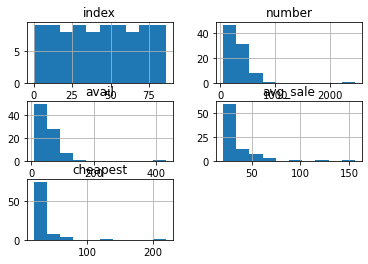

In [ ]:
df_acc_att.hist()

C:\Users\julia\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


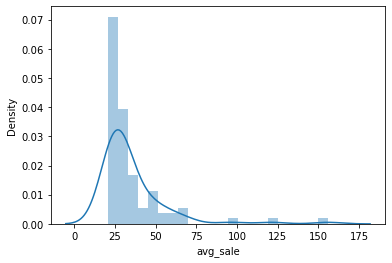

In [ ]:
sns.distplot(df_acc_att.avg_sale)
plt.savefig('densityplot_sales', transparent=True)

<AxesSubplot:>

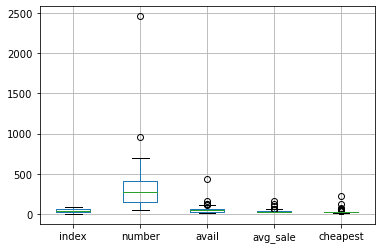

In [ ]:
df_acc_att.boxplot()

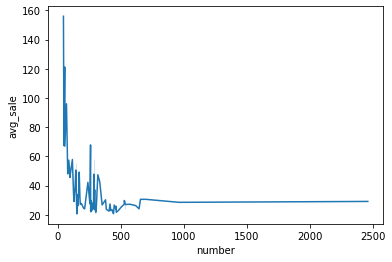

In [ ]:
#number of punks that have the same feature compared to average sale price over time
sns.lineplot(x=df_acc_att.number, y=df_acc_att.avg_sale)
plt.savefig('All Sales', transparent=True)


<AxesSubplot:xlabel='avg_sale', ylabel='avail'>

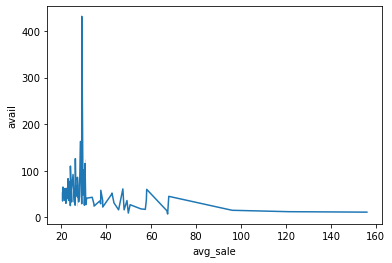

In [ ]:
sns.lineplot(x=df_acc_att.avg_sale, y=df_acc_att.avail)

# Dummy Encode

In [ ]:
df_test=df.copy()
list_att = df_acc_att.attributes

In [ ]:
g = pd.DataFrame(columns=list_att)
g.rename(columns={'index':'number'},
          inplace=True)
g

attributes,Beanie,Choker,Pilot Helmet,Tiara,Orange Side,Buck Teeth,Welding Goggles,Pigtails,Pink With Hat,Top Hat,...,Regular Shades,Horned Rim Glasses,Big Shades,Nerd Glasses,Black Lipstick,Mole,Purple Lipstick,Hot Lipstick,Cigarette,Earring


In [ ]:
df.loc[df.acc_1=='Earring', 'acc_1':'acc_7']
if df.loc[1,:].str.contains('Smile').any():
    print("TX is there")
x=g.copy()
x

,acc_1,acc_2,acc_3,acc_4,acc_5,acc_6,acc_7
45,Earring,Mole,NaN,NaN,NaN,NaN,NaN
63,Earring,Shaved Head,Small Shades,NaN,NaN,NaN,NaN
95,Earring,Mohawk,NaN,NaN,NaN,NaN,NaN
146,Earring,Mohawk,NaN,NaN,NaN,NaN,NaN
208,Earring,Shaved Head,3D Glasses,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
9787,Earring,Eye Patch,Mohawk Dark,NaN,NaN,NaN,NaN
9839,Earring,Knitted Cap,VR,NaN,NaN,NaN,NaN
9855,Earring,Headband,Small Shades,NaN,NaN,NaN,NaN
9870,Earring,Horned Rim Glasses,Cowboy Hat,NaN,NaN,NaN,NaN


In [ ]:
for counter in range(df.shape[0]):
  for i in g:
    if df.loc[counter,:].str.contains(i).any():
      x.loc[counter,i] = 1

x.to_csv('accessories_transformed.csv', mode='w', index=False)    